In [2]:
# import polars as pl
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(pd.read_json("data/Yelp JSON/yelp_dataset/yelp_academic_dataset_business.json", lines=True))

In [4]:
MO_df = df[df['state'] == 'MO']
MO_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
95,pEm4xNCk8d0TF6A1gi-WDQ,TKO DJs,2650 S Big Bend,Maplewood,MO,63143,38.613576,-90.322383,3.5,17,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Karaoke, DJs, Event Planning & Services, Party...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
99,1MeIwdbTnZOBFCKOrgaxuw,Ricardo's Italian Cafe,1931 Park Ave,Saint Louis,MO,63104,38.617272,-90.212784,3.5,80,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","American (New), Restaurants, Cafes, Italian, A...","{'Monday': '11:0-14:0', 'Tuesday': '16:0-21:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150258,MtlPWQUsK87FAYf4JKNndg,China 1,7740 Watson Rd,Saint Louis,MO,63119,38.572572,-90.333021,4.0,26,0,"{'RestaurantsAttire': ''casual'', 'HasTV': 'Tr...","Food, Restaurants, Chinese","{'Monday': '10:30-21:30', 'Wednesday': '10:30-..."
150304,5Z8iBpJMmOMz6G_7oVnzRA,SSM Medical Group Dorsett Village,2024 Dorsett Village,Maryland Heights,MO,63043,38.715094,-90.455972,2.5,7,1,"{'AcceptsInsurance': 'True', 'ByAppointmentOnl...","Doctors, Family Practice, Health & Medical",None
150310,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,MO,63115,38.660185,-90.225247,5.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Caterers, Convenience Stores, Food, Event Plan...","{'Tuesday': '12:0-18:0', 'Wednesday': '12:0-18..."
150315,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,MO,63108,38.641988,-90.261655,4.0,71,1,"{'RestaurantsPriceRange2': '3', 'DogsAllowed':...","Health Markets, Specialty Food, Food, Grocery","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."


/Users/johnkaspers/Documents/NYCapartment/Yelp_data_playground/venv/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='longitude', ylabel='latitude'>

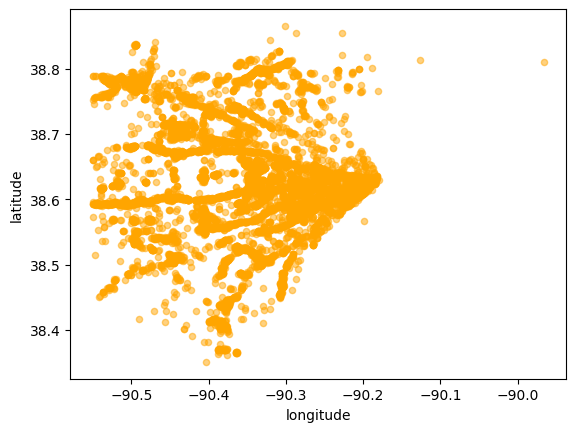

In [5]:
MO_df.plot(x="longitude", y="latitude", kind="scatter", c="orange", alpha=0.5,
        colormap="YlOrRd")

In [6]:
StLouis_df = MO_df[MO_df['city'] == 'St. Louis']
StLouis_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
193,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,100,1,"{'Alcohol': 'u'none'', 'BikeParking': 'True', ...","Fast Food, Restaurants, Food, Burgers, Coffee ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
225,cSeA6pC9JUlGfz-RNfvnGw,Midwest RV Center,6200 Heimos Industrial Park Dr,St. Louis,MO,63129,38.464156,-90.371669,4.0,33,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Trailer Dealers, Auto Parts & Supplies, Auto R...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
429,0Up4mOWP588Leb_dqoDiYQ,Rogers & Hollands® Jewelers,18 S County Center Way,St. Louis,MO,63129,38.506236,-90.331521,4.0,7,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Watches, Jewelry Repair, Local Services, Shopp...","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'..."
475,hsyIDX4x4ndYEvPoJF6_1g,Merendero La Catrachitas,5639 S Kingshighway Blvd,St. Louis,MO,63109,38.578724,-90.282217,4.5,22,1,"{'RestaurantsTableService': 'True', 'Caters': ...","Latin American, Honduran, Restaurants","{'Monday': '10:0-21:0', 'Wednesday': '10:0-21:..."
514,9qxMhGWjGsuPUoQB3Y74Wg,McDonald's,1119 N Tucker,St. Louis,MO,63101,38.636908,-90.195483,1.5,62,1,"{'BikeParking': 'True', 'RestaurantsAttire': '...","Food, Restaurants, Coffee & Tea, Burgers, Fast...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149866,7RoarRQWRh9V4JtiQUd_EA,Saks Fifth Avenue,1 Plaza Frontenac Street,St. Louis,MO,63131,38.631179,-90.407398,3.5,31,1,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Accessories, Men's Clothing, Shopping, Departm...","{'Monday': '10:0-17:0', 'Tuesday': '12:0-17:0'..."
149907,HWGuDqc4uea7AAdD1naV0w,Taze Mediterranean Street Food,8 S Euclid Ave,St. Louis,MO,63108,38.639932,-90.261876,3.5,44,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Mediterranean, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
150053,qu84rS2gClt1MeSb99CrKg,Starbucks,10701 Natural Bridge Rd,St. Louis,MO,63145,38.737384,-90.355433,2.0,8,1,"{'BusinessParking': '{'garage': False, 'street...","Coffee & Tea, Food","{'Monday': '0:0-0:0', 'Tuesday': '4:30-17:0', ..."
150219,l81Ii_ARHJiRdajq2IVRrQ,Cleaning Concepts Maid Service of St. Louis,8837 Manchester Rd,St. Louis,MO,63144,38.612819,-90.350696,4.0,10,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Office Cleaning, Local Services, Biohazard Cle...","{'Monday': '0:0-0:0', 'Tuesday': '8:30-17:0', ..."


<Axes: xlabel='longitude', ylabel='latitude'>

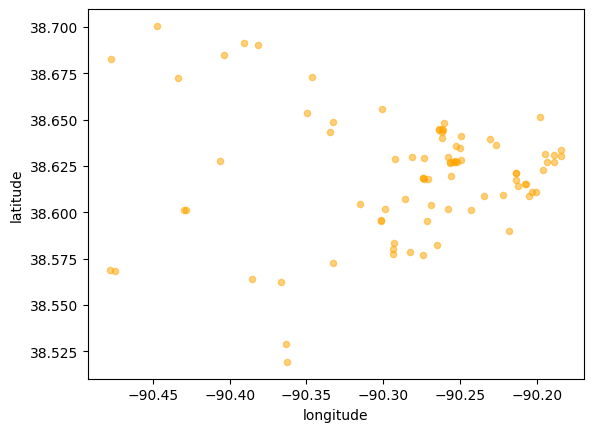

In [7]:
StLouis_df.query('categories.str.contains("Restaurant")').query('review_count > 100').query('stars > 3.6').plot(x="longitude", y="latitude", kind="scatter", c="orange", alpha=0.5,)

In [8]:
import duckdb

In [9]:
sample_query = "SELECT name, city, state, postal_code, latitude, longitude, stars, review_count FROM MO_df WHERE city = 'St. Louis' AND categories LIKE '%Restaurant%' AND review_count > 100 AND stars > 3.6"

duckdb.query(sample_query)

┌────────────────────────────────────────────┬───────────┬─────────┬─────────────┬───────────────┬────────────────┬────────┬──────────────┐
│                    name                    │   city    │  state  │ postal_code │   latitude    │   longitude    │ stars  │ review_count │
│                  varchar                   │  varchar  │ varchar │   varchar   │    double     │     double     │ double │    int64     │
├────────────────────────────────────────────┼───────────┼─────────┼─────────────┼───────────────┼────────────────┼────────┼──────────────┤
│ Carnivore                                  │ St. Louis │ MO      │ 63110       │    38.6184117 │    -90.2741825 │    4.5 │          281 │
│ Grace Meat + Three                         │ St. Louis │ MO      │ 63110       │    38.6267906 │    -90.2567049 │    4.5 │          470 │
│ Sauce on the Side                          │ St. Louis │ MO      │ 63110       │ 38.6271043879 │ -90.2566847205 │    4.5 │          232 │
│ Crown Candy Kitche

In [10]:
stl_query = """
SELECT name, review_count FROM StLouis_df
QUALIFY ROW_NUMBER() OVER (PARTITION BY categories ORDER BY review_count DESC) = 1
ORDER BY review_count DESC
LIMIT 10
 """

duckdb.query(stl_query)

┌────────────────────────────────────────┬──────────────┐
│                  name                  │ review_count │
│                varchar                 │    int64     │
├────────────────────────────────────────┼──────────────┤
│ Rooster - Downtown                     │         1984 │
│ Mission Taco Joint - Delmar Loop       │         1019 │
│ Charlie Gitto's On the Hill            │          678 │
│ Clementine's Naughty and Nice Creamery │          585 │
│ Mission Taco Joint - Historic Soulard  │          578 │
│ Crown Candy Kitchen                    │          558 │
│ Nudo House STL                         │          479 │
│ El Burro Loco                          │          475 │
│ Grace Meat + Three                     │          470 │
│ Jilly's Cupcake Bar & Café             │          467 │
├────────────────────────────────────────┴──────────────┤
│ 10 rows                                     2 columns │
└───────────────────────────────────────────────────────┘

In [11]:
duckdb.query("SELECT name, city, state, postal_code, latitude, longitude, stars, review_count FROM df WHERE categories LIKE '%Restaurant%' AND review_count > 100 AND stars > 3.6")

┌─────────────────────────────────┬─────────────────┬─────────┬─────────────┬───────────────┬─────────────────┬────────┬──────────────┐
│              name               │      city       │  state  │ postal_code │   latitude    │    longitude    │ stars  │ review_count │
│             varchar             │     varchar     │ varchar │   varchar   │    double     │     double      │ double │    int64     │
├─────────────────────────────────┼─────────────────┼─────────┼─────────────┼───────────────┼─────────────────┼────────┼──────────────┤
│ Tuna Bar                        │ Philadelphia    │ PA      │ 19106       │     39.953949 │     -75.1432262 │    4.0 │          245 │
│ BAP                             │ Philadelphia    │ PA      │ 19147       │     39.943223 │      -75.162568 │    4.5 │          205 │
│ The Green Pheasant              │ Nashville       │ TN      │ 37201       │    36.1598858 │     -86.7731974 │    4.0 │          161 │
│ Helena Avenue Bakery            │ Santa Barbar

## Identify the most popular business across different categories

In [12]:
# Load the Yelp business data
business_df = pd.read_json("data/Yelp JSON/yelp_dataset/yelp_academic_dataset_business.json", lines=True)

# Load the Yelp review data
review_df = pd.read_json("data/Yelp JSON/yelp_dataset/yelp_academic_dataset_review.json", lines=True)

# Example analysis: Distribution of business categories
category_counts = business_df['categories'].str.split(', ').explode().value_counts()
category_counts.head(10)

# Example analysis: Distribution of ratings
rating_counts = review_df['stars'].value_counts().sort_index()
rating_counts

# Example analysis: Average rating by city
average_rating_by_city = business_df.groupby('city')['stars'].mean().sort_values(ascending=False)
average_rating_by_city.head(10)

city
Sparks,             5.0
POTTSTOWN           5.0
Fernley             5.0
Overbrook           5.0
Bridgeton           5.0
LOWER PROVIDENCE    5.0
Yardley Boro        5.0
Edgemoor            5.0
Belleville          5.0
Wesley Chapel       5.0
Name: stars, dtype: float64

In [13]:
most_popular_business_across_categories = business_df.groupby('name')['review_count'].sum().sort_values(ascending=False)
most_popular_business_across_categories.head(10)


name
Starbucks                 20692
McDonald's                17359
Dunkin'                    9864
Chipotle Mexican Grill     9383
First Watch                8921
Acme Oyster House          8372
Taco Bell                  8325
Chick-fil-A                8004
Oceana Grill               7400
Panera Bread               7246
Name: review_count, dtype: int64

In [14]:
most_popular_business_across_categories_QUERY = """
SELECT categories, name, SUM(review_count) AS total_reviews
FROM business_df
GROUP BY categories, name
ORDER BY total_reviews DESC
LIMIT 10
"""

result = duckdb.query(most_popular_business_across_categories_QUERY).df()
print(result)

                                          categories  \
0                                 Food, Coffee & Tea   
1  Live/Raw Food, Seafood, Restaurants, Cajun/Creole   
2  Restaurants, Seafood, Cajun/Creole, Breakfast ...   
3                                 Coffee & Tea, Food   
4  American (Traditional), Chicken Shop, Southern...   
5  Candy Stores, Shopping, Department Stores, Fas...   
6  Restaurants, American (Traditional), American ...   
7  Cajun/Creole, Restaurants, Event Planning & Se...   
8  American (New), Restaurants, Sandwiches, Seafo...   
9  French, Restaurants, Cocktail Bars, Nightlife,...   

                                 name  total_reviews  
0                           Starbucks         8174.0  
1                   Acme Oyster House         7568.0  
2                        Oceana Grill         7400.0  
3                           Starbucks         6688.0  
4  Hattie B’s Hot Chicken - Nashville         6093.0  
5             Reading Terminal Market         5721.0 

In [15]:
most_popular_business_across_categories_QUERY = """
SELECT categories, name, review_count
FROM business_df
QUALIFY ROW_NUMBER() OVER (PARTITION BY categories ORDER BY review_count DESC) = 1
ORDER BY review_count DESC
LIMIT 10
"""

result = duckdb.query(most_popular_business_across_categories_QUERY).df()
print(result)

                                          categories  \
0  Live/Raw Food, Seafood, Restaurants, Cajun/Creole   
1  Restaurants, Seafood, Cajun/Creole, Breakfast ...   
2  American (Traditional), Chicken Shop, Southern...   
3  Candy Stores, Shopping, Department Stores, Fas...   
4  Restaurants, American (Traditional), American ...   
5  Cajun/Creole, Restaurants, Event Planning & Se...   
6  American (New), Restaurants, Sandwiches, Seafo...   
7  French, Restaurants, Cocktail Bars, Nightlife,...   
8  German, Restaurants, Seafood, Cocktail Bars, F...   
9                 Cajun/Creole, Seafood, Restaurants   

                                 name  review_count  
0                   Acme Oyster House          7568  
1                        Oceana Grill          7400  
2  Hattie B’s Hot Chicken - Nashville          6093  
3             Reading Terminal Market          5721  
4          Ruby Slipper - New Orleans          5193  
5                 Mother's Restaurant          5185  
6    

In [16]:
# Explode the categories into individual rows
business_df['categories'] = business_df['categories'].str.split(', ')
exploded_df = business_df.explode('categories')

# Remove rows with missing categories
exploded_df = exploded_df.dropna(subset=['categories'])

# Define a metric for popularity (e.g., review count)
# Group by category and find the business with the highest review count in each category
most_popular_businesses = exploded_df.loc[exploded_df.groupby('categories')['review_count'].idxmax()]

# Select relevant columns for display
most_popular_businesses = most_popular_businesses[['categories', 'name', 'review_count', 'stars', 'city', 'state']]

# Display the most popular businesses across different categories
most_popular_businesses.head(10)

,categories,name,review_count,stars,city,state
97391,Employment Law,Affordable Notary Service,20,5.0,New Orleans,LA
97391,Personal Injury Law,Affordable Notary Service,20,5.0,New Orleans,LA
97391,Local Services,Affordable Notary Service,20,5.0,New Orleans,LA
97391,Couriers & Delivery Services,Affordable Notary Service,20,5.0,New Orleans,LA
97391,Lawyers,Affordable Notary Service,20,5.0,New Orleans,LA
97391,Notaries,Affordable Notary Service,20,5.0,New Orleans,LA
97391,Professional Services,Affordable Notary Service,20,5.0,New Orleans,LA
97391,Estate Planning Law,Affordable Notary Service,20,5.0,New Orleans,LA
97391,Wills,Affordable Notary Service,20,5.0,New Orleans,LA
97391,Trusts,Affordable Notary Service,20,5.0,New Orleans,LA


## Analyze the distribution of businesses across different cities or regions

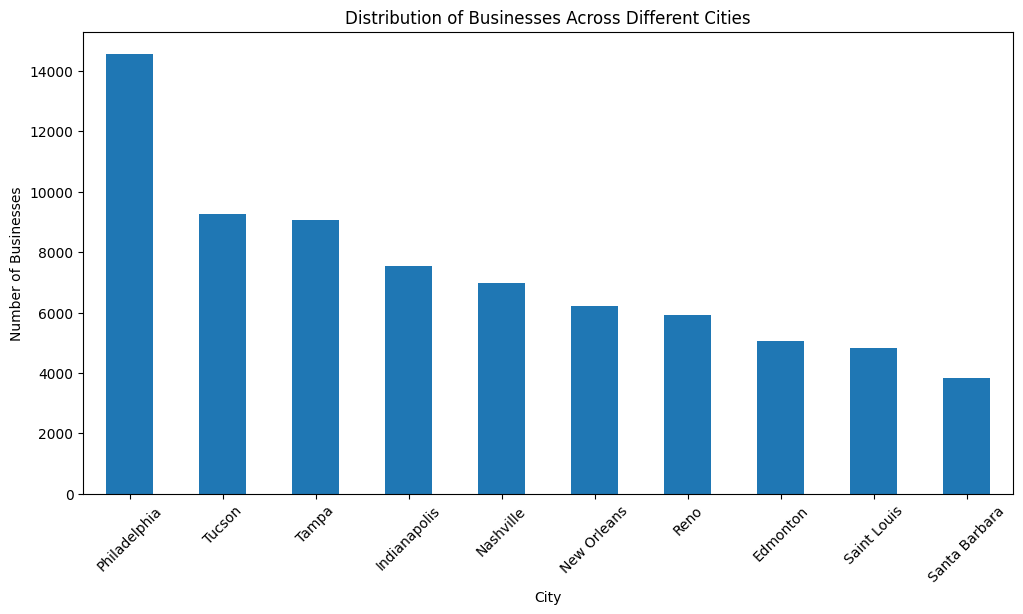

In [17]:
# Group by city and count the number of businesses in each city
city_counts = business_df['city'].value_counts().head(10)  # Top 10 cities

# Plot the distribution of businesses across different cities
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Businesses')
plt.title('Distribution of Businesses Across Different Cities')
plt.xticks(rotation=45)
plt.show()

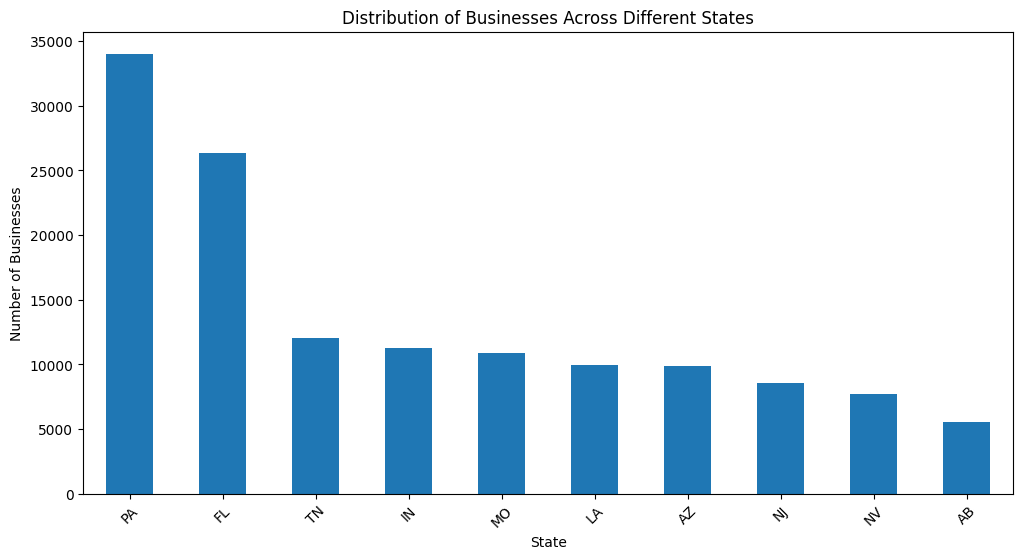

In [18]:
# Group by state and count the number of businesses in each state
state_counts = business_df['state'].value_counts().head(10)  # Top 10 states

# Plot the distribution of businesses across different states
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Businesses')
plt.title('Distribution of Businesses Across Different States')
plt.xticks(rotation=45)
plt.show()

####  Compare performance and characteristics of chain businesses versus independent businesses

             stars  review_count  business_count
is_chain                                        
False     3.782571     45.521180          106138
True      3.150527     43.294901           44208


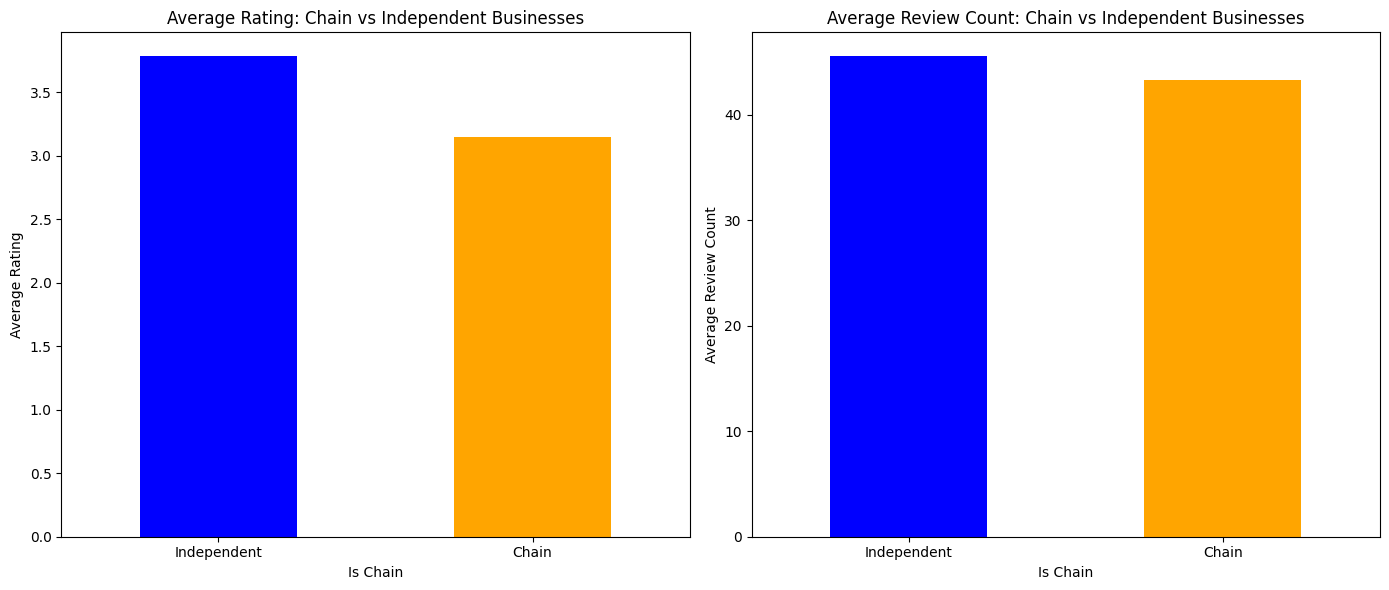

In [19]:
# Identify chain businesses (businesses with the same name in multiple locations)
business_counts = business_df['name'].value_counts()
chain_businesses = business_counts[business_counts > 1].index
business_df['is_chain'] = business_df['name'].isin(chain_businesses)

# Group by chain and independent businesses
grouped = business_df.groupby('is_chain').agg({
    'stars': 'mean',
    'review_count': 'mean',
    'name': 'count'
}).rename(columns={'name': 'business_count'})

# Print the comparison
print(grouped)

# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Average rating comparison
grouped['stars'].plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Average Rating: Chain vs Independent Businesses')
axes[0].set_xlabel('Is Chain')
axes[0].set_ylabel('Average Rating')
axes[0].set_xticklabels(['Independent', 'Chain'], rotation=0)

# Average review count comparison
grouped['review_count'].plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Average Review Count: Chain vs Independent Businesses')
axes[1].set_xlabel('Is Chain')
axes[1].set_ylabel('Average Review Count')
axes[1].set_xticklabels(['Independent', 'Chain'], rotation=0)

plt.tight_layout()
plt.show()